# Problem Statement

## Determine which features are most important for predicting academic success of students.To predict the grade of students on bases of given features.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Data Collection
df=pd.read_csv('Student_performance_data _.csv')

In [3]:
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [4]:
#showing rows and columns of dataframe
df.shape

(2392, 15)

In [5]:
#information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [6]:
df['GradeClass'].value_counts()

GradeClass
4.0    1211
3.0     414
2.0     391
1.0     269
0.0     107
Name: count, dtype: int64

<Axes: xlabel='GradeClass', ylabel='count'>

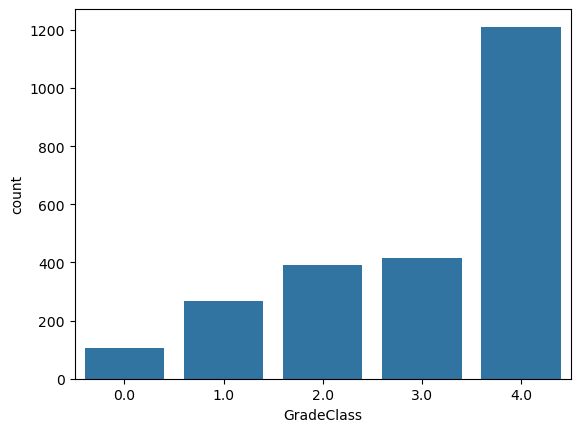

In [7]:
sns.countplot(x = df['GradeClass'])

In [8]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [9]:
df.tail()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0
2391,3392,16,1,0,2,17.819907,13,0,2,0,0,0,1,2.140014,1.0


In [10]:
#shows statical information
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [11]:
# check null values
df.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

## Check Outliers & Handel outliers

In [12]:
a=df.describe().columns
a

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

In [13]:
for i in a:
    plt.boxplot(x=df[i])
    plt.title(i)
    plt.show()

    q1=df[i].quantile(0.25)
    q2=df[i].quantile(0.50)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    
    upper_tail=q3+(1.5*iqr)
    lower_tail=q1-(1.5*iqr)

    print("Q1=",q

SyntaxError: incomplete input (318017723.py, line 14)

In [ ]:
#ParentalEducation---->this columns  have outliers

In [ ]:
df['ParentalEducation'].value_counts()

In [ ]:
#1)-ParentalEducation
plt.figure()
plt.boxplot(df['ParentalEducation'])
plt.title('ParentalEducation')
plt.show()

q1=df['ParentalEducation'].quantile(0.25)
q2=df['ParentalEducation'].quantile(0.50)
q3=df['ParentalEducation'].quantile(0.75)
iqr=q3-q1
upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr

print("q1---",q1)
print("q2---",q2)
print("q3---",q3)
print("iqr---",iqr)
print("uppertail---",upper_tail)
print("lowertail---",lower_tail)

In [ ]:
#find outliers and replace it with uppertail
df.loc[df['ParentalEducation']>upper_tail] 
df.loc[df['ParentalEducation']>upper_tail,'ParentalEducation']=upper_tail

## skewness

In [ ]:
a=df.describe().columns
a

In [ ]:
from scipy.stats import skew 

In [ ]:
for i in a:
    print(i,skew(df[i]))

## LabelEncoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Distinction is based on the number of different values in the column
columns = list(df.columns)
categoric_columns = []
numeric_columns = []

for i in columns:
    if len(df[i].unique()) >5:
        numeric_columns.append(i)
    else:
        categoric_columns.append(i)
        

print('Numerical features: ', numeric_columns)
print('Categorical features: ', categoric_columns)

In [ ]:
df[numeric_columns] = df[numeric_columns].astype('float64')

In [ ]:
laben= LabelEncoder()

# Encode categorical features
df = df.copy()
for column in df[categoric_columns]:  
    df[column] = laben.fit_transform(df[column])

## Scalling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
b=StandardScaler()

In [ ]:
for i in numeric_columns:
    df[i]=b.fit_transform(df[[i]])
    print(i,skew(df[i]))

### shows correaltions in Features

In [ ]:
df.corr()

In [ ]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), annot = True)
plt.title('The correlation among features')
plt.show()


## Train Test Split

In [ ]:
x=df.drop(columns=["GradeClass","StudentID","Age","GPA"],axis=1)
y=df['GradeClass']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [ ]:
x_train

In [ ]:
y_train

In [ ]:
x_test

In [ ]:
y_test

## Model traning

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix

In [ ]:
logreg = LogisticRegression()
dt = DecisionTreeClassifier()
svm  = SVC()
rf=RandomForestClassifier()

## Model Evaulation

In [ ]:
def mymodel(model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print("Accuracy Score :",accuracy_score(y_test,y_pred))
    print("Classification report \n:", classification_report(y_test,y_pred))
    print("Multilabel COnfusion Matrix\n",multilabel_confusion_matrix(y_test, y_pred))

    train = model.score(x_train,y_train)
    test = model.score(x_test,y_test)

    print("Training score :",train)
    print("Testing score :",test)

    return model

In [ ]:
mymodel(logreg)

In [ ]:
mymodel(dt)

In [ ]:
mymodel(svm)

In [ ]:
mymodel(rf)

# Best Model Is SVM

In [ ]:
svm.fit(x_train, y_train)
model_score = svm.score(x_test, y_test)
y_pred = svm.predict(x_test)

print(model_score)

# Hyperparameter Tunning

In [ ]:
svm = SVC(kernel='linear')

In [ ]:
mymodel(svm)

In [ ]:
svm = SVC(kernel='poly')

In [ ]:
mymodel(svm)

In [ ]:
svm = SVC(kernel='sigmoid')

In [ ]:
mymodel(svm)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C':[1,10],'gamma':[1,10]}

In [ ]:
gs = GridSearchCV(svm,param_grid,verbose=3)

In [ ]:
gs.fit(x_train,y_train)

In [ ]:
param_grid = {'C':[10],'gamma':[1]}

In [ ]:
gs = GridSearchCV(svm,param_grid,verbose=3)

In [ ]:
mymodel(svm)

# Final Model

In [ ]:
svm = SVC(kernel='linear',C=1.0,gamma=1)

In [ ]:
mymodel(svm)

# create pickel file

In [ ]:
import pickle

In [ ]:
with open('mymodel.pkl', 'wb') as file:
    pickle.dump(mymodel, file)

# Conclusion

A Support Vector Machine predicts the grade of students using the features provided with 79% accuracy on the test set with hyperparameter tuning.